# Differential Equation for Conductance

Here we want to numerically solve a first-order partial linear ordinary differential equation for the function $g[V(t),t]$. The equation reads

$\frac{\partial g[V(t),t]}{\partial t} = \frac{g_{\infty}[V(t)]-g[V(t),t]}{\tau}$

and physically describes the dynamics of the value of conductance in an ionic channel [arXiv:2309.11438].

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
sys.path.append('../codes/')
import odeint_solver
import plotting_functions
from parameters import *

### ODEINT Python Package

Let us first simplify the equation

$\frac{\partial g[V(t),t]}{\partial t} = \frac{g_{\infty}[V(t)]-g[V(t),t]}{\tau} = f(t) - \frac{g[V(t),t]}{\tau} $

definig $g_{\infty}$ as general function $f(t)$ of the independent variable $t$. We are going to use the ODEINT packege of Pythoin to solve the equation.

In the following, we choose a voltage dependent on time with a triangular shape which oscillates in the range $[-1,1]$.

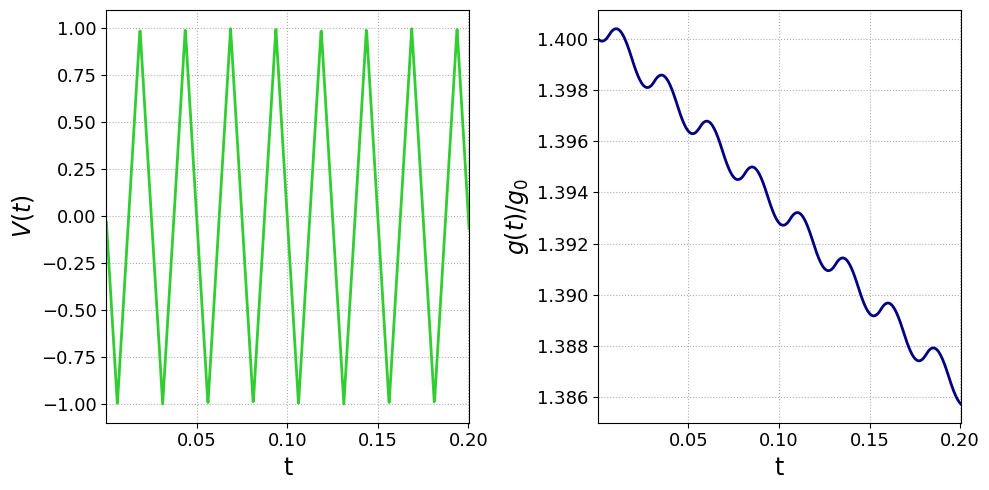

In [3]:
odeint_solver.odeint_solver_function('triangular')
odeint_solver.triangular_potential(0, write=True)
fig, ax = plt.subplots(1,2, figsize=(10,5))
plotting_functions.plot_voltage(ax[0])
plotting_functions.plot_gsolution(ax[1], solver = 'odeint')
fig.tight_layout()

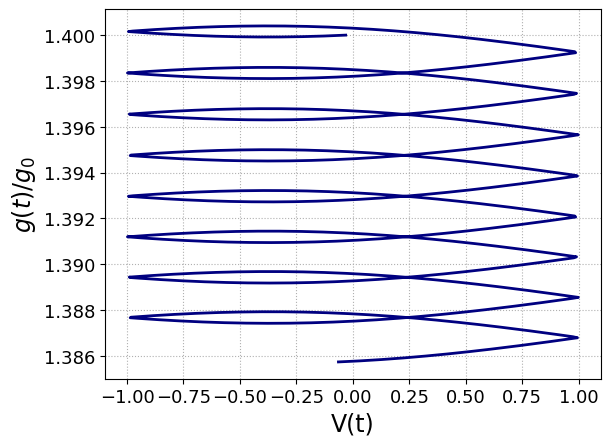

In [4]:
fig, ax = plt.subplots()
plotting_functions.plot_conductance_voltage(ax)

1e-05 -4.566959014546968e-13
1e-05 -9.161178255675611e-13
1e-05 -1.377850110405146e-12
1e-05 -1.8417024149469415e-12
1e-05 -2.307482309114343e-12
1e-05 -2.774995675685167e-12
1e-05 -3.2440471155636214e-12
1e-05 -3.714440354543216e-12
1e-05 -4.18597864970772e-12
1e-05 -4.658465193636888e-12
1e-05 -5.1317035146191495e-12
1e-05 -5.605497871122897e-12
1e-05 -6.079653638839791e-12
1e-05 -6.55397768868783e-12
1e-05 -7.028278754245988e-12
1e-05 -7.502367787188058e-12
1e-05 -7.976058299385762e-12
1e-05 -8.449166690462924e-12
1e-05 -8.921512559699212e-12
1e-05 -9.392919001304284e-12
1e-05 -9.863212882208407e-12
1e-05 -1.0332225101643884e-11
1e-05 -1.0799790831920397e-11
1e-05 -1.1265749739925508e-11
1e-05 -1.1729946189009548e-11
1e-05 -1.2192229421037628e-11
1e-05 -1.2652453718513561e-11
1e-05 -1.3110478546795978e-11
1e-05 -1.3566168676538796e-11
1e-05 -1.4019394286592564e-11
1e-05 -1.4470031047701968e-11
1e-05 -1.4917960187425437e-11
1e-05 -1.5363068536786386e-11
1e-05 -1.580524855924107e-11
1

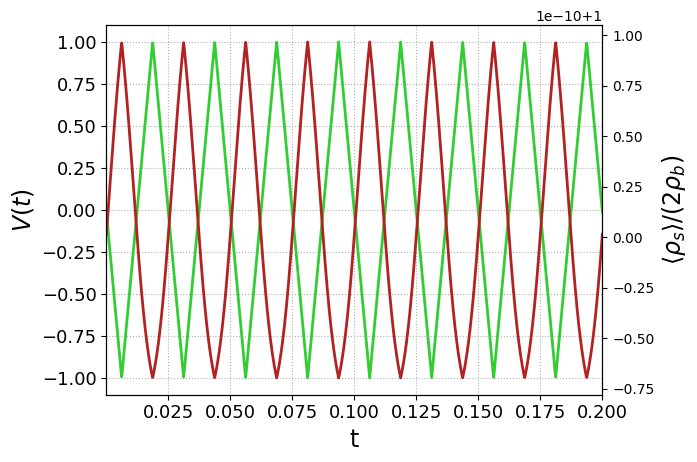

In [47]:
odeint_solver.average_density_steady()
fig, ax = plt.subplots()
plotting_functions.plot_voltage_density_steady(ax)

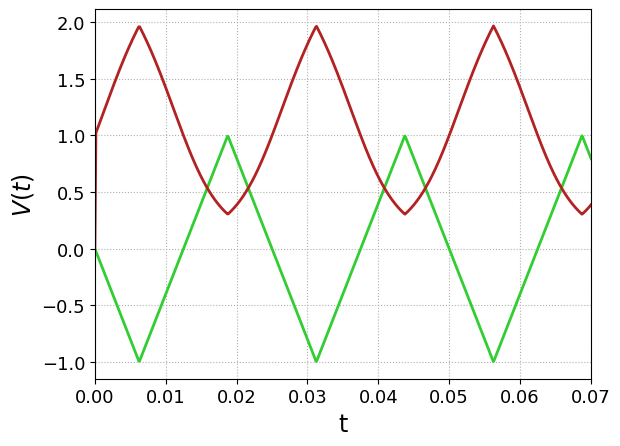

In [45]:
fig, ax = plt.subplots()
plotting_functions.plot_voltage(ax)
plotting_functions.plot_avdensity(ax)

0.0 0.0 0.0 60.867809250367884 0.0 0.0
1.0000000000000001e-07 0.0025188916876574307 0.010444596157624275 60.867809250367884 0.00017159474418838473 0.002347296943469046
2.0000000000000002e-07 0.005076142131979695 0.021159847112712793 60.867809250367884 0.00034763608832504353 0.0047285060436546515
3.0000000000000004e-07 0.007672634271099745 0.03215579144481029 60.867809250367884 0.000528288956688809 0.007144345314410936
4.0000000000000003e-07 0.010309278350515462 0.04344294888663103 60.867809250367884 0.0007137261784457678 0.009595552172069694
5.000000000000001e-07 0.01298701298701299 0.055032348529712616 60.867809250367884 0.0009041289510412271 0.012082884035971762
6.000000000000001e-07 0.015706806282722516 0.06693555898360959 60.867809250367884 0.0010996873356864743 0.014607118947036042
7.000000000000001e-07 0.01846965699208443 0.07916472064472835 60.867809250367884 0.0013006007875049303 0.017169056204579498
8.000000000000001e-07 0.02127659574468085 0.09173258024505526 60.8678092503678

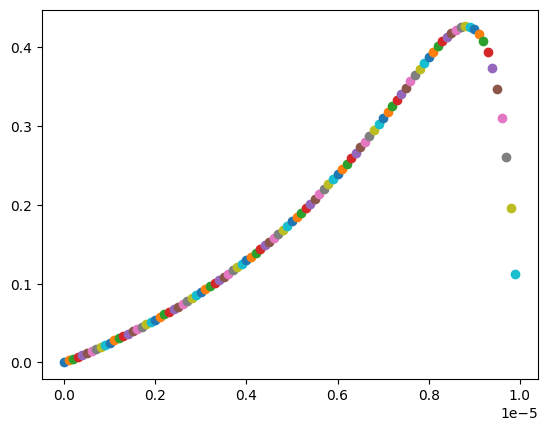

In [39]:
from parameters import *
x_size = length_channel/100
fig, ax = plt.subplots()
for i in range(100):
    x = i*x_size
    y = odeint_solver.integrand(x, 1)
    ax.scatter(x,y)

### Euler Forward

1e-05 -0.009168082805056856
1e-05 -0.018437947177128388
1e-05 -0.02778509488708454
1e-05 -0.037193882605602926
1e-05 -0.046648526604344806
1e-05 -0.056133233129134825
1e-05 -0.06563232620640555
1e-05 -0.07513037067431094
1e-05 -0.08461228841930785
1e-05 -0.09406346604188494
1e-05 -0.10346985245961453
1e-05 -0.11281804526873523
1e-05 -0.12209536501355278
1e-05 -0.13128991684295632
1e-05 -0.14039063935317797
1e-05 -0.14938734071502624
1e-05 -0.1582707224536055
1e-05 -0.1670323914825565
1e-05 -0.17566486118891034
1e-05 -0.18416154251671216
1e-05 -0.19251672610755696
1e-05 -0.20072555662571948
1e-05 -0.20878400042765358
1e-05 -0.2166888077343003
1e-05 -0.22443747043457649
1e-05 -0.23202817659467334
1e-05 -0.23945976267548183
1e-05 -0.24673166437457225
1e-05 -0.25384386691425315
1e-05 -0.26079685549750314
1e-05 -0.2675915665525546
1e-05 -0.2633778359773829
1e-05 -0.25648467056271984
1e-05 -0.24943259393673267
1e-05 -0.24222094506205188
1e-05 -0.23484954437221556
1e-05 -0.22731874308580916
1

TypeError: plot_gsolution() missing 1 required positional argument: 'solver'

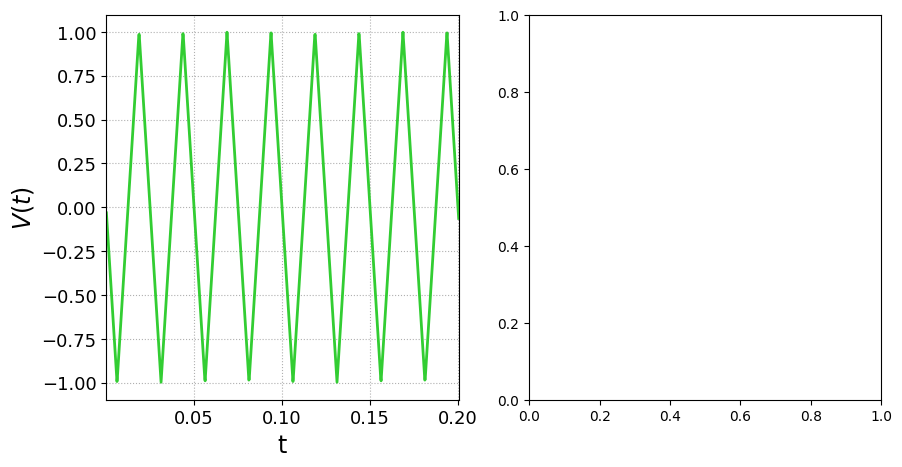

In [56]:
odeint_solver.euler_forward_solver('triangular')
odeint_solver.triangular_potential(0, write=True)
fig, ax = plt.subplots(1,2, figsize=(10,5))
plotting_functions.plot_voltage(ax[0])
plotting_functions.plot_gsolution(ax[1], 'euler')
fig.tight_layout()